# 5 Linear Regression: Housing Price Forecast


5.1 Introduction to the Experiment

5.1.1 About the Experiment

This experiment is an instance of TensorFlow linear regression, that is, housing price forecast.

5.1.2 Objectives of the Experiment

Understand the linear regression.
Understand how to use TensorFlow to make a prediction.

5.1.3 Experiment Content

This experiment takes an instance to introduce how to use linear regression to predict the housing price and how to make such a prediction in TensorFlow. Commonly, the dataset of Boston housing price is used to predict the housing price. This experiment uses the dataset of Beijing housing price, which is more applicable to China.


In [1]:
#5.2 Experimental Process
#Load the database required for this project.
from __future__ import print_function, division
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:

# import data
train = pd.read_csv(r"bj_housing.csv")
train = train[train['Area'] < 300]
print(len(train))
print(train.head())


9959
   Area  Value  Room  Living  School  Year  Floor
0   128    370     3       1       1  2004     21
1    68    330     1       2       1  2000      6
2   125    355     3       2       0  2003      5
3   129    278     2       2       0  2005     16
4   118    340     3       2       0  2003      6


In [3]:
train_X = train['Area'].values.reshape(-1,1)
train_Y = train['Value'].values.reshape(-1,1)
n_samples = train_X.shape[0]
learning_rate = 2
# set learning rate
training_epochs = 100
# set display_step
display_step = 10


In [4]:
#Define the X and Y placeholders.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(),name = "weight", dtype = tf.float32)
b = tf.Variable(np.random.randn(), name = "bias", dtype = tf.float32)


In [5]:
#Create a structure of forward propagation.
#pred = W * X + b
pred = tf.add(tf.multiply(W,X),b)
#Loss function
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*n_samples)
#Use the gradient descent optimizer.
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


In [6]:
#Enable Init.
init = tf.global_variables_initializer()


In [7]:
#Enable circulation to start training.
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict = {X: train_X, Y:train_Y})
        if (epoch)%display_step ==  0:
            c = sess.run(cost, feed_dict= {X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.3f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    print("--------------------------------------------------")
    training_cost = sess.run(cost, feed_dict = {X: train_X, Y:train_Y})
    w_final = sess.run(W)
    b_final = sess.run(b)
    print("Training cost = ", training_cost , "W=", w_final, "b=",b_final,'\n')  


Epoch: 0001 cost= 18595.451 W= 2.4112637 b= 1.1361899
Epoch: 0011 cost= 19744.367 W= 2.3239503 b= 0.9744512
Epoch: 0021 cost= 11269.982 W= 4.0274405 b= 2.5662386
Epoch: 0031 cost= 11296.874 W= 4.0362015 b= 2.4413998
Epoch: 0041 cost= 10856.712 W= 3.4694717 b= 1.7238418
Epoch: 0051 cost= 10758.692 W= 3.5255063 b= 1.6157529
Epoch: 0061 cost= 10643.396 W= 3.6905015 b= 1.6065626
Epoch: 0071 cost= 10657.767 W= 3.7358403 b= 1.4706141
Epoch: 0081 cost= 10650.176 W= 3.7216215 b= 1.270606
Epoch: 0091 cost= 10644.293 W= 3.7034774 b= 1.0644417
Optimization Finished!
--------------------------------------------------
Training cost =  10642.372 W= 3.6860905 b= 0.8775688 



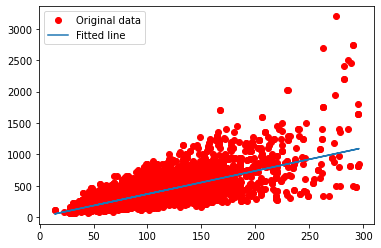

In [8]:
import matplotlib.pyplot as plt
# show the plot 
plt.plot(train_X, train_Y, 'ro', label="Original data") 
plt.plot(train_X, w_final * train_X + b_final, label="Fitted line") 
plt.legend()
plt.show()


5.3 Instance Description

This experiment uses the dataset of Beijing housing price to predict the housing price of Beijing and realize the application of TensorFlow linear regression.

